In [21]:
from evoman.environment import Environment
from demo_controller import player_controller

import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

## box plot

In [27]:
'''
def find_best_solution(enemy_group, method):
    print(f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt')
    file_name = f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt'
    best_files = glob.glob(file_name)
    best_fitness = -np.inf
    best_solution = None

    for file in best_files:
        sol = np.loadtxt(file)
        fitness, _, _, _ = env.play(sol)
        
        if fitness > best_fitness:
            best_solution = sol

    return best_solution

'''

"\ndef find_best_solution(enemy_group, method):\n    print(f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt')\n    file_name = f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt'\n    best_files = glob.glob(file_name)\n    best_fitness = -np.inf\n    best_solution = None\n\n    for file in best_files:\n        sol = np.loadtxt(file)\n        fitness, _, _, _ = env.play(sol)\n        \n        if fitness > best_fitness:\n            best_solution = sol\n\n    return best_solution\n\n"

In [23]:
def extract_all_sols(enemy_group, method):
   
    #
    main_dir = f'experiments_train_generalist_{enemy_group}'
    sols_list = []

    #
    for subdir in os.listdir(main_dir):
        # 
        if subdir.startswith(f'optimization_generalist_generalist_{method}'):
            best_file_path = os.path.join(main_dir, subdir, 'best.txt')
            
            # check if the file exist
            if os.path.exists(best_file_path):
                try:
                
                    sol = np.loadtxt(best_file_path)
                    sols_list.append(sol)
                except Exception as e:
                    print(f"mistake")
            else:
                print(f"not exist")

   
    return sols_list

In [24]:
n_hidden_neurons = 10

env = Environment(experiment_name='best_experiment_test',
                multiplemode="yes",
                playermode="ai",
				player_controller=player_controller(n_hidden_neurons),
				speed="fastest",
				enemymode="static",
                logs="off",
                randomini="yes",
				level=2,
				visuals=True)

results = {}
method_list = ['GA1', 'GA2']
enemy_groups = ['1_3_4_6', '2_5_7_8']

env.update_parameter('enemies', [1,2,3,4,5,6,7,8])

for enemy_group in enemy_groups:
    for method in method_list:
        
        #env.update_parameter('enemies', [1,2,3,4,5,6,7,8])
        #sol = find_best_solution(enemy_group, method)
        sol_list = extract_all_sols(enemy_group, method)
        individual_gain_list = []
        for sol in sol_list:
            
            _, player_life, enemy_life, _=env.play(sol)
            indivdual_gain=player_life-enemy_life
            individual_gain_list.append(indivdual_gain)
        
        results[(enemy_group, method)] = individual_gain_list

In [25]:
results 

{('1_3_4_6', 'GA1'): [-50.32926688468169,
  -19.02320132940182,
  -46.99567863641141,
  -44.51245605810972,
  -26.499345504060642,
  -27.22046607086622,
  -24.457767500781987,
  -28.696821724262776,
  -44.23426931939271,
  -23.118784861860682],
 ('1_3_4_6', 'GA2'): [-25.77315084072215,
  -20.54044933505322,
  -18.97211494498003,
  -25.395906719222356,
  -12.271299900024097,
  -23.109242221957214,
  -33.9463462105456,
  -20.015799246271754,
  -8.93229330771847,
  -19.361553811346123],
 ('2_5_7_8', 'GA1'): [-12.40462883076247,
  -0.2380171575463237,
  -0.8512004515571228,
  -12.555255745121872,
  -14.89737116447294,
  3.800107513856471,
  2.6746131490407272,
  -24.030540245559312,
  -17.262770821004356,
  -9.039875160103534],
 ('2_5_7_8', 'GA2'): [-20.150308001253727,
  2.069827528480367,
  -7.928328841780328,
  -0.1306672339471735,
  -8.06697714118257,
  -13.727540347502863,
  -12.862260133263515,
  -28.984927684302804,
  -2.3566537197889303,
  -32.16525150246304]}

{'whiskers': [<matplotlib.lines.Line2D at 0x183980a98e0>,
 'caps': [<matplotlib.lines.Line2D at 0x183986e5a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x183980a9d00>,
 'medians': [<matplotlib.lines.Line2D at 0x183986e5e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x183986e5ac0>,
 'means': []}

Text(0.5, 1.0, 'Boxplot of Gain Values')

Text(0, 0.5, 'Individual Gain')

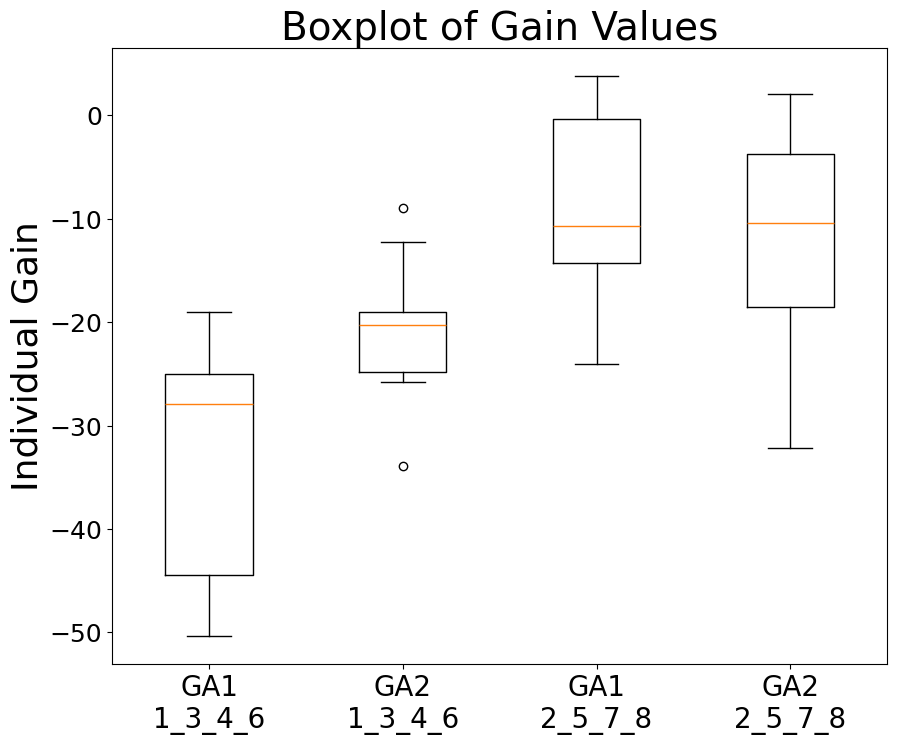

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
data = [results[key] for key in sorted(results.keys())]
labels = [f"{e}\n{m}" for m, e in sorted(results.keys())]

ax.boxplot(data, labels=labels)
ax.set_title('Boxplot of Gain Values', fontsize=28)
ax.set_ylabel('Individual Gain', fontsize=26)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=18)
# plt.xticks(rotation=45)
plt.savefig("box_plot_2.png", dpi=150)

In [27]:
# Mann-Whitney U test
alpha = 0.05
mannwhitney_results = {}

for enemy_group in enemy_groups:
    ga_results = results[(enemy_group, 'GA1')]
    es_results = results[(enemy_group, 'GA2')]

    u_stat, p_value = stats.mannwhitneyu(ga_results, es_results, alternative='two-sided')
    mannwhitney_results[enemy_group] = {'u_stat': u_stat, 'p_value': p_value}


for enemy_group, res in mannwhitney_results.items():
    print(f"Enemy {enemy_group} - U statistic: {res['u_stat']:.3f}, p-value: {res['p_value']:.3e}")
    if res['p_value'] < alpha:
        print(f"For Enemy {enemy_group}, the difference between GA_1 and GA_2 is statistically significant.")
    else:
        print(f"For Enemy {enemy_group}, no significant difference was found.")

Enemy 1_3_4_6 - U statistic: 16.000, p-value: 1.133e-02
For Enemy 1_3_4_6, the difference between GA_1 and GA_2 is statistically significant.
Enemy 2_5_7_8 - U statistic: 59.000, p-value: 5.205e-01
For Enemy 2_5_7_8, no significant difference was found.


In [28]:
# t-test
ttest_results = {}

for enemy_group in enemy_groups:
    ga_results = results[(enemy_group, 'GA1')]
    es_results = results[(enemy_group, 'GA2')]

    t_stat, p_value = stats.ttest_ind(ga_results, es_results, equal_var=False)
    ttest_results[enemy_group] = {'t_stat': t_stat, 'p_value': p_value}

for enemy_group, res in ttest_results.items():
    print(f"Enemy {enemy_group} - t-statistic: {res['t_stat']:.3f}, p-value: {res['p_value']:.3e}")
    if res['p_value'] < alpha:
        print(f"For Enemy {enemy_group}, the difference between GA_1 and GA_2 is statistically significant.")
    else:
        print(f"For Enemy {enemy_group}, no significant difference was found.")

Enemy 1_3_4_6 - t-statistic: -2.955, p-value: 9.938e-03
For Enemy 1_3_4_6, the difference between GA_1 and GA_2 is statistically significant.
Enemy 2_5_7_8 - t-statistic: 0.833, p-value: 4.160e-01
For Enemy 2_5_7_8, no significant difference was found.


In [29]:
# Kolmogorov-Smirnov test
ks_results = {}

for enemy_group in enemy_groups:
    ga_results = results[(enemy_group, 'GA1')]
    es_results = results[(enemy_group, 'GA2')]

    ks_stat, p_value = stats.ks_2samp(ga_results, es_results)
    ks_results[enemy_group] = {'ks_stat': ks_stat, 'p_value': p_value}

for enemy_group, res in ks_results.items():
    print(f"Enemy {enemy_group} - KS statistic: {res['ks_stat']:.3f}, p-value: {res['p_value']:.3e}")

Enemy 1_3_4_6 - KS statistic: 0.600, p-value: 5.245e-02
Enemy 2_5_7_8 - KS statistic: 0.200, p-value: 9.945e-01


In [30]:
# Kruskal-Wallis H test
kruskal_results = {}

for enemy_group in enemy_groups:
    ga_results = results[(enemy_group, 'GA1')]
    es_results = results[(enemy_group, 'GA2')]

    h_stat, p_value = stats.kruskal(ga_results, es_results)  
    kruskal_results[enemy_group] = {'h_stat': h_stat, 'p_value': p_value}

for enemy_group, res in kruskal_results.items():
    print(f"Enemy {enemy_group} - H statistic: {res['h_stat']:.3f}, p-value: {res['p_value']:.3e}")

    if res['p_value'] < alpha:
        print(f"For Enemy {enemy_group}, the difference between GA and ES is statistically significant.")
    else:
        print(f"For Enemy {enemy_group}, no significant difference was found.")

Enemy 1_3_4_6 - H statistic: 6.606, p-value: 1.017e-02
For Enemy 1_3_4_6, the difference between GA and ES is statistically significant.
Enemy 2_5_7_8 - H statistic: 0.463, p-value: 4.963e-01
For Enemy 2_5_7_8, no significant difference was found.


## Very Best

In [31]:
n_hidden_neurons = 10

'''
env = Environment(experiment_name='best_experiment_test',
                multiplemode="yes",
                playermode="ai",
				player_controller=player_controller(n_hidden_neurons),
				speed="fastest",
				enemymode="static",
                logs="off",
                randomini="yes",
				level=2,
				visuals=True)
''' 

results = {}
method_list = ['GA1', 'GA2']
enemy_groups = ['1_3_4_6', '2_5_7_8']

best_gain = -np.inf
best_solution = None
best_file_name = None

for enemy_group in enemy_groups:
    for method in method_list:
        print(f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt')
        file_name = f'experiments_train_generalist_{enemy_group}/optimization_generalist_generalist_{method}_*'+'/best.txt'
        best_files = glob.glob(file_name)   
        
        for file in best_files:
            sol = np.loadtxt(file)
            #env.update_parameter('enemies', [1,2,3,4,5,6,7,8])
            _, player_life, enemy_life, _ = env.play(sol)
            avg_gain = player_life - enemy_life
        
            if avg_gain > best_gain:
                best_gain = avg_gain
                best_solution = sol
                best_file_name = file

'\nenv = Environment(experiment_name=\'best_experiment_test\',\n                multiplemode="yes",\n                playermode="ai",\n\t\t\t\tplayer_controller=player_controller(n_hidden_neurons),\n\t\t\t\tspeed="fastest",\n\t\t\t\tenemymode="static",\n                logs="off",\n                randomini="yes",\n\t\t\t\tlevel=2,\n\t\t\t\tvisuals=True)\n'

experiments_train_generalist_1_3_4_6/optimization_generalist_generalist_GA1_*/best.txt
experiments_train_generalist_1_3_4_6/optimization_generalist_generalist_GA2_*/best.txt
experiments_train_generalist_2_5_7_8/optimization_generalist_generalist_GA1_*/best.txt
experiments_train_generalist_2_5_7_8/optimization_generalist_generalist_GA2_*/best.txt


In [38]:
print(best_file_name)
print(best_solution)

experiments_train_generalist_2_5_7_8\optimization_generalist_generalist_GA2_20241018-010746\best.txt
[ 0.60073388 -0.41015465 -0.34048379  0.8499766   0.54825643 -0.51304915
  0.80801077  0.58199113 -0.03025086 -0.61121154 -0.16059245  0.05584901
 -0.63380917 -0.29272197 -0.64622068 -0.50323254  1.06269787 -0.76968373
  0.20923829 -0.03071445  0.61402263 -0.23858193 -0.74275213 -0.94824459
 -0.63787967  0.70778841  0.70914373 -0.67788664 -1.1222797  -0.75428394
 -0.39563242  0.88892244 -1.03093239  0.24970824  0.3212386   0.68802388
  0.66450102  0.51399998 -0.78695888  0.96842698 -0.32123133  0.02481327
  0.77406604 -0.20225889 -0.2988722   0.07065422  0.88267641 -0.80398555
  0.54539511 -0.40382234 -0.62695361  0.44016969 -0.31627284  0.68957389
  0.90342199 -0.10138107  0.49415511 -0.00235002 -0.62585548 -0.95380905
  0.11325297 -0.30240758 -0.75787337  0.62558542  0.36692001 -0.96469453
  0.30088635 -0.49866204 -0.9044345   0.43762006 -1.01884475 -0.60347194
  0.37978055 -0.7493134

In [39]:
print(best_file_name)

experiments_train_generalist_2_5_7_8\optimization_generalist_generalist_GA2_20241018-010746\best.txt


In [40]:
n_hidden_neurons = 10

env = Environment(experiment_name='best_experiment_test',
                playermode="ai",
				player_controller=player_controller(n_hidden_neurons),
				speed="fastest",
				enemymode="static",
                logs="off",
                randomini="yes",
				level=2,
				visuals=True)


individual_gain_list = []


for i in range(1,9):
    
    env.update_parameter('enemies', [i])
    _, player_life, enemy_life, _ = env.play(best_solution)
    individual_gain = int(player_life - enemy_life)
    individual_gain_list.append(individual_gain)

print(individual_gain_list)

[-90, 46, -90, -80, 33, -70, 37, 52]
